# Data Collection
Link: https://raw.githubusercontent.com/twiradinata/datasets/main/property_surabaya.csv

Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Import Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Import Classifier Models

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#Import Model Evaluation Metrics
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Data loading

In [2]:
link = 'https://raw.githubusercontent.com/twiradinata/datasets/main/property_surabaya.csv'
dataset = pd.read_csv(link, sep=';')
dataset.head()

,cluster_name,surface_area,building_area,bedrooms,bathrooms,storey,community_price,price,ownership_status,facing,house_position,road_width,urgent,building_age,ready_to_use,furnished,category,pricing_category
0,Northwest Lake,72,69,2,2,2,1400000000,1350000000,Hak Guna Bangunan (HGB),Selatan,Standard,1-2 Mobil,No,1 - 4 Tahun,Yes,No,Premium,Over Priced
1,Bukit Palma,60,90,3,2,2,1000000000,1125000000,Pengikatan Perjanjian Jual Beli (PPJB),Selatan,Standard,1-2 Mobil,No,1 - 4 Tahun,Yes,No,Standard,Over Priced
2,Palma Classica,210,100,4,2,1,2400000000,1999000000,Hak Milik (SHM),Utara,Standard,> 2 Mobil,Yes,5 - 10 Tahun,Yes,No,Standard,Normal Price
3,Bukit Palma,120,54,3,1,1,800000000,850000000,Hak Milik (SHM),Selatan,Standard,> 2 Mobil,No,> 10 Tahun,No,No,Standard,Under Priced
4,Bukit Palma,60,90,3,2,2,800000000,1025000000,Hak Guna Bangunan (HGB),Selatan,Standard,> 2 Mobil,No,1 - 4 Tahun,Yes,No,Standard,Over Priced


In [3]:
# Normalizing the price
dataset['price'] = dataset['price']/1000000
# Dropping cluster name and community price
dataset = dataset.drop(['cluster_name'], axis=1)

# Exploratory Data Analysis

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   surface_area      490 non-null    int64  
 1   building_area     490 non-null    int64  
 2   bedrooms          490 non-null    int64  
 3   bathrooms         490 non-null    int64  
 4   storey            490 non-null    int64  
 5   community_price   490 non-null    int64  
 6   price             490 non-null    float64
 7   ownership_status  490 non-null    object 
 8   facing            490 non-null    object 
 9   house_position    490 non-null    object 
 10  road_width        490 non-null    object 
 11  urgent            480 non-null    object 
 12  building_age      448 non-null    object 
 13  ready_to_use      490 non-null    object 
 14  furnished         490 non-null    object 
 15  category          490 non-null    object 
 16  pricing_category  451 non-null    object 
dt

In [5]:
dataset.describe()

,surface_area,building_area,bedrooms,bathrooms,storey,community_price,price
count,490.000000,490.000000,490.000000,490.000000,490.000000,4.900000e+02,490.000000
mean,210.679592,241.763265,4.197959,3.265306,1.877551,4.418763e+09,4506.184020
std,204.129939,238.778138,2.155413,2.093671,0.512927,7.785302e+09,7623.816047
min,35.000000,32.000000,0.000000,1.000000,1.000000,3.000000e+08,300.000000
25%,96.250000,110.000000,3.000000,2.000000,2.000000,1.500000e+09,1400.000000
50%,155.000000,178.500000,4.000000,3.000000,2.000000,2.500000e+09,2550.000000
75%,240.000000,280.000000,5.000000,4.000000,2.000000,4.500000e+09,4300.000000
max,2000.000000,2000.000000,36.000000,36.000000,4.000000,1.200000e+11,105000.000000


In [6]:
# Check missing values
dataset.isnull().sum()

surface_area         0
building_area        0
bedrooms             0
bathrooms            0
storey               0
community_price      0
price                0
ownership_status     0
facing               0
house_position       0
road_width           0
urgent              10
building_age        42
ready_to_use         0
furnished            0
category             0
pricing_category    39
dtype: int64

In [7]:
dataset.dropna(inplace=True)

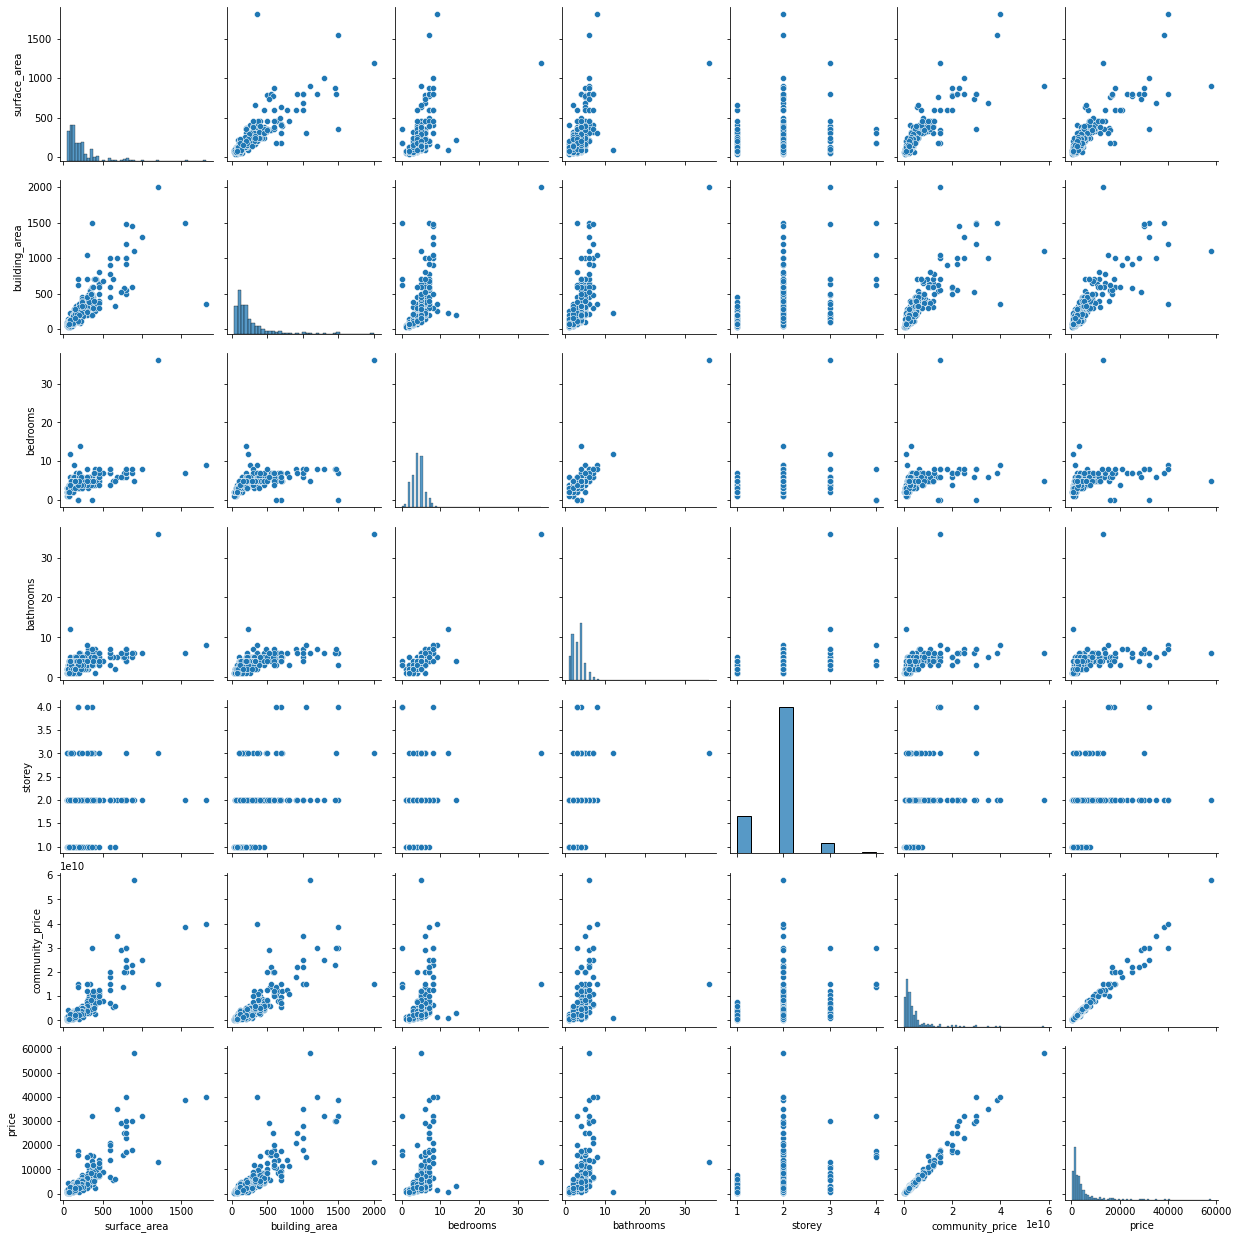

In [8]:
sns.pairplot(dataset)

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


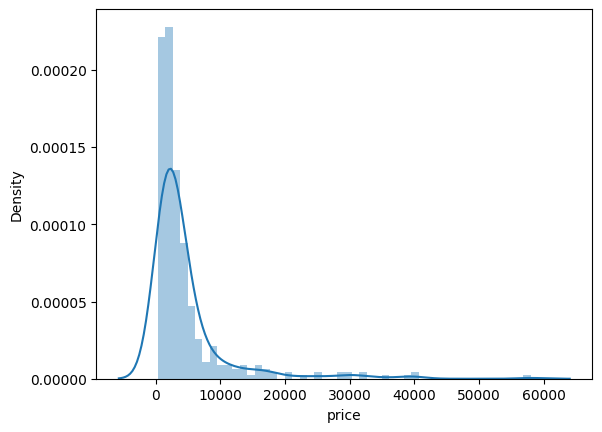

In [9]:
# price distribution
sns.distplot(dataset['price'])
plt.show()

Correlation of numerical features

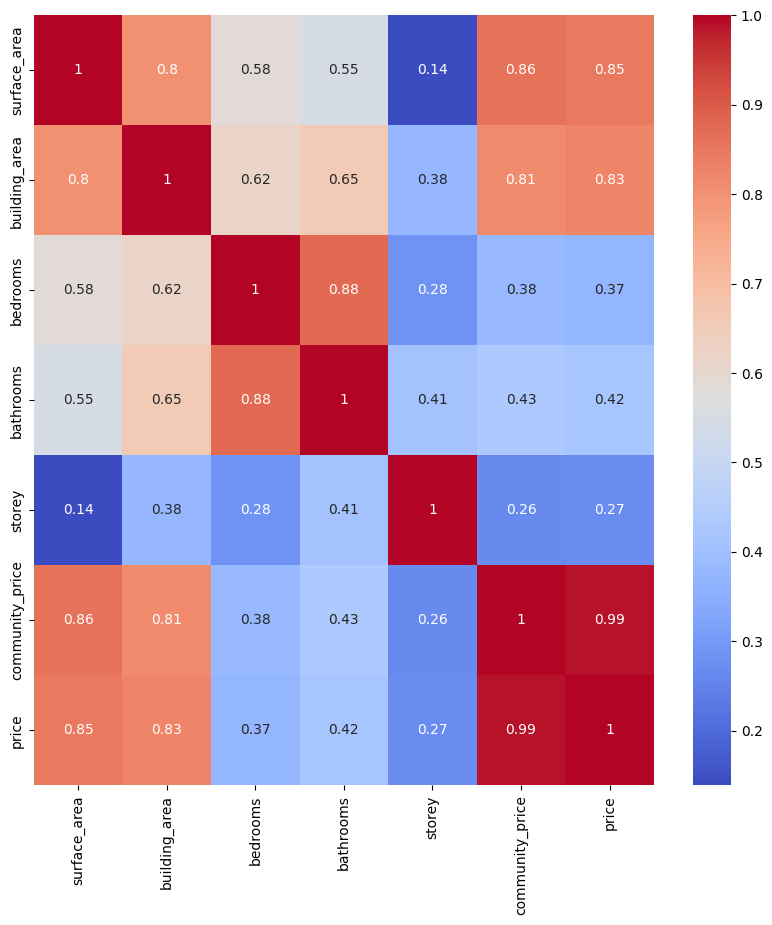

In [10]:
#Correlation of features and price
corr = dataset.corr()
corr['price'].sort_values(ascending=False)
#Plot correlation
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

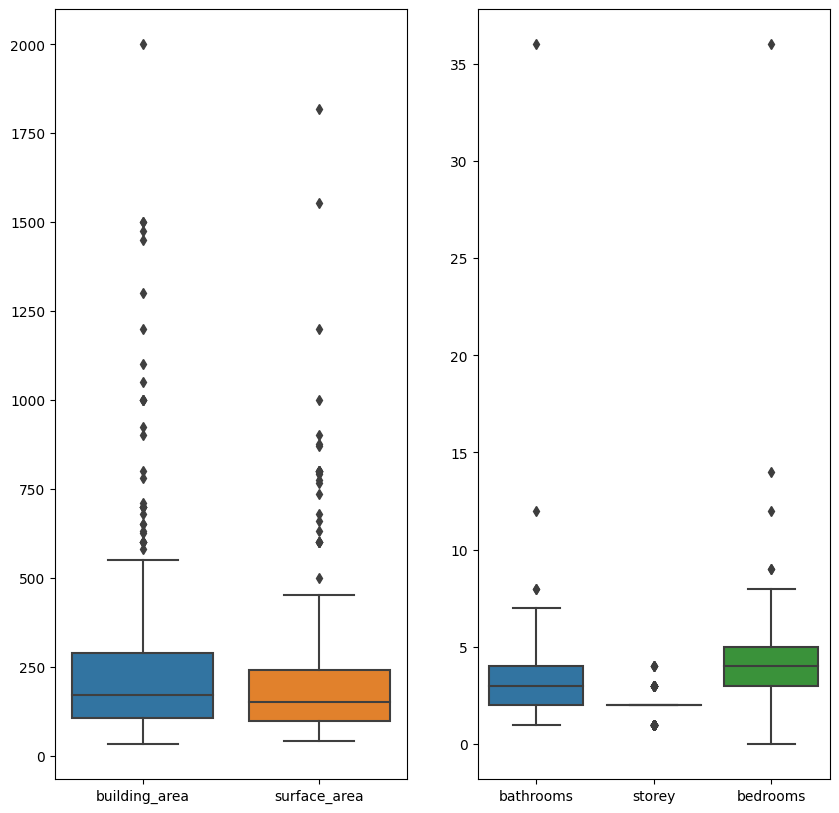

In [11]:
#Boxplot
fig, ax = plt.subplots(1, 2, figsize=(10,10))
sns.boxplot(data=dataset.loc[:, ['building_area', 'surface_area']], ax=ax[0])
sns.boxplot(data=dataset.loc[:, ['bathrooms', 'storey', 'bedrooms']], ax=ax[1])
plt.show()

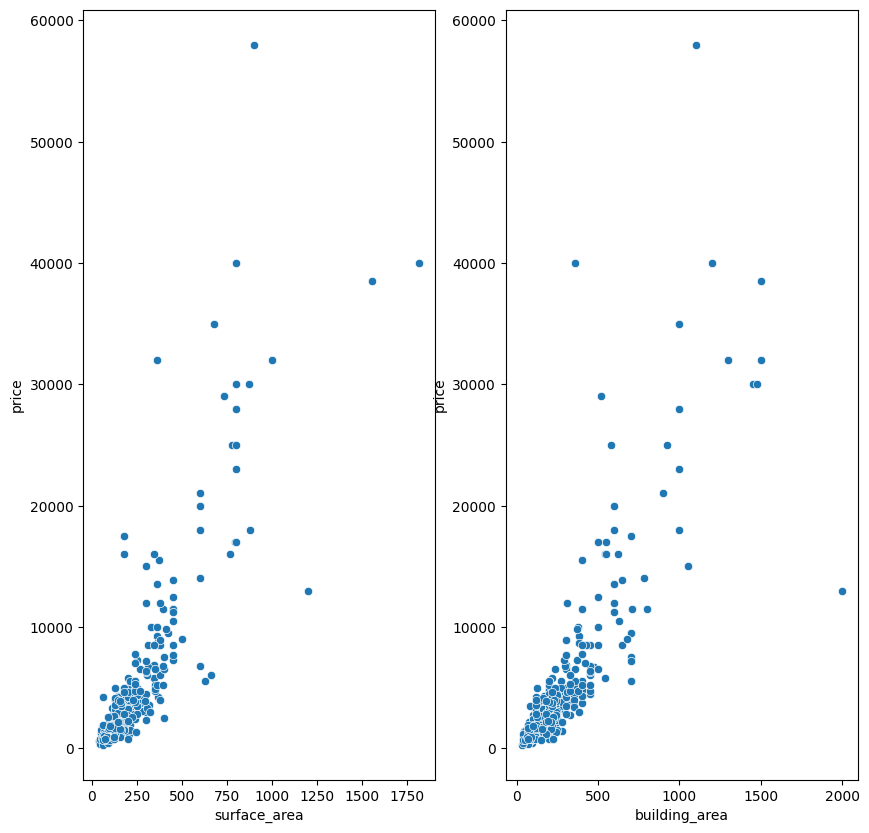

<Figure size 1000x1000 with 0 Axes>

In [12]:
# Scatterplots
fig, ax = plt.subplots(1, 2, figsize=(10,10))
plt.figure(figsize=(10,10))
sns.scatterplot(x='surface_area', y='price', data=dataset, ax=ax[0])
sns.scatterplot(x='building_area', y='price', data=dataset, ax=ax[1])
plt.show()

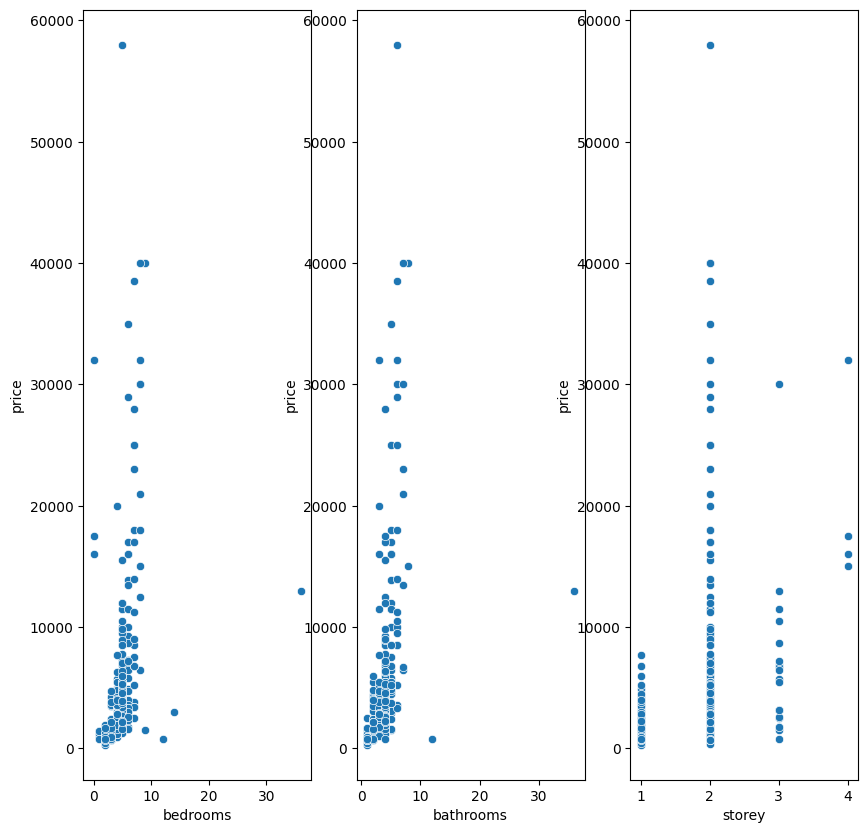

<Figure size 1000x1000 with 0 Axes>

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(10,10))
plt.figure(figsize=(10,10))
sns.scatterplot(x='bedrooms', y='price', data=dataset, ax=ax[0])
sns.scatterplot(x='bathrooms', y='price', data=dataset, ax=ax[1])
sns.scatterplot(x='storey', y='price', data=dataset, ax=ax[2])
plt.show()

Data Distribution of numerical features

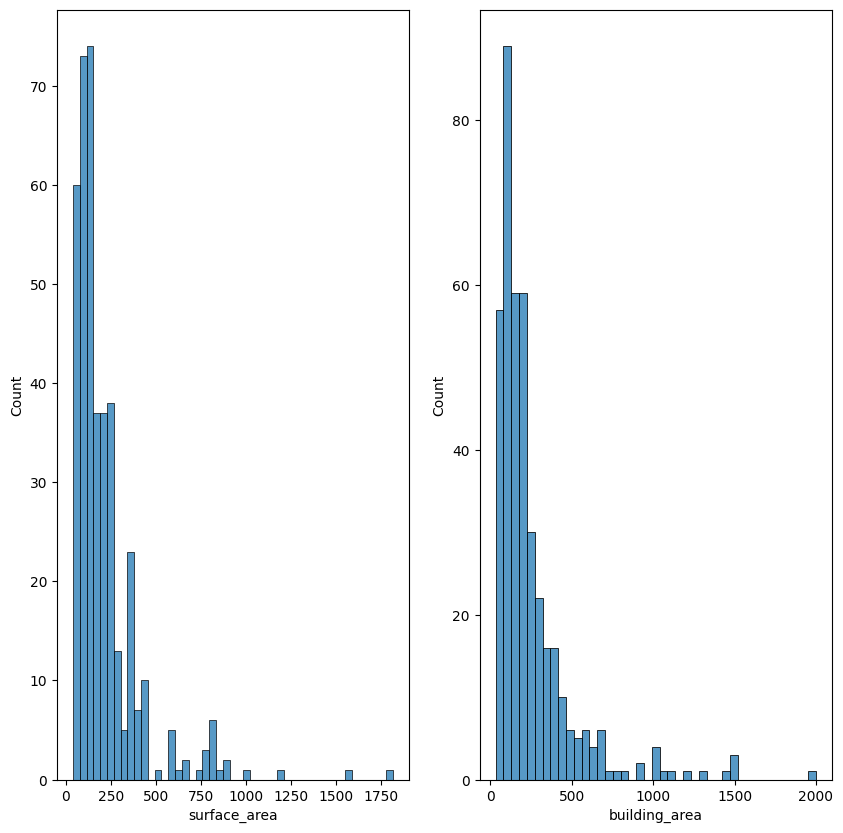

In [14]:
# Data histogram
fig, ax = plt.subplots(1, 2, figsize=(10,10))
sns.histplot(dataset['surface_area'], ax=ax[0])
sns.histplot(dataset['building_area'], ax=ax[1])
plt.show()

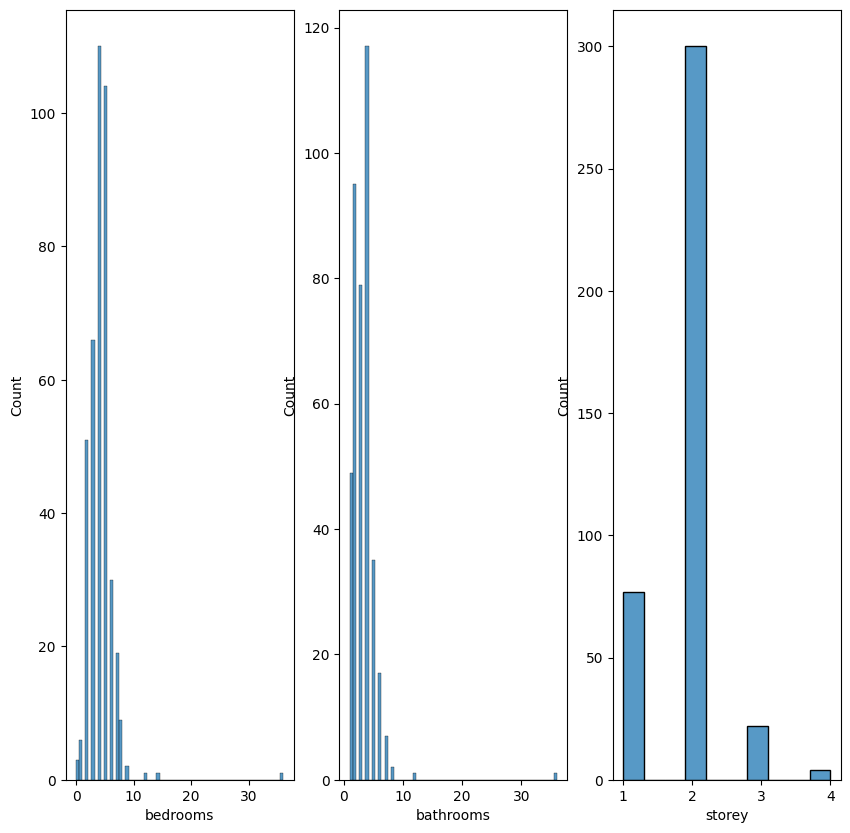

<Figure size 1000x1000 with 0 Axes>

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(10,10))
plt.figure(figsize=(10,10))
sns.histplot(dataset['bedrooms'], ax=ax[0])
sns.histplot(dataset['bathrooms'], ax=ax[1])
sns.histplot(dataset['storey'], ax=ax[2])
plt.show()

Data Distribution of categorical features

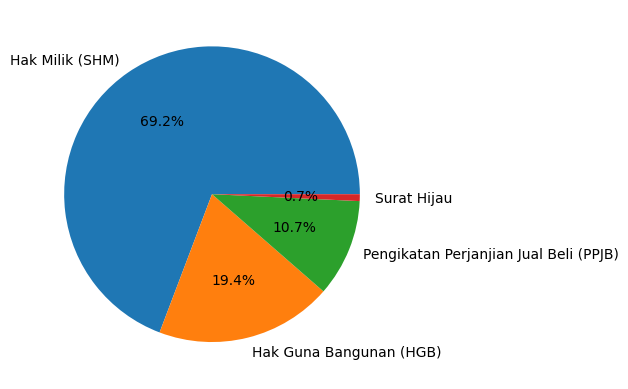

In [16]:
# Distribution of ownership status
plt.figsize=(10,10)
plt.pie(dataset['ownership_status'].value_counts(), labels = dataset['ownership_status'].value_counts().index, autopct='%1.1f%%')
plt.show()

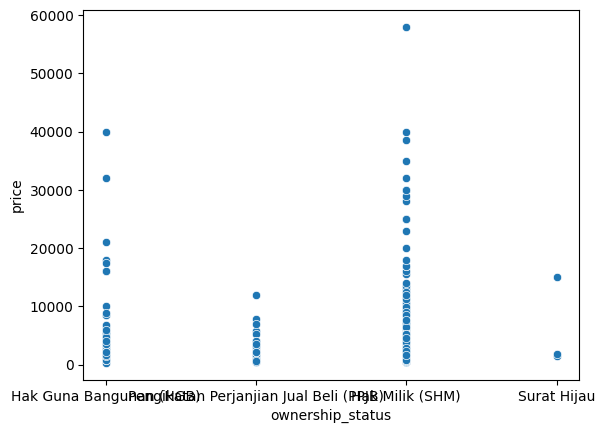

In [17]:
# Ownership status and price
plt.figsize=(10,10)
sns.scatterplot(x='ownership_status', y='price', data=dataset)
plt.show()

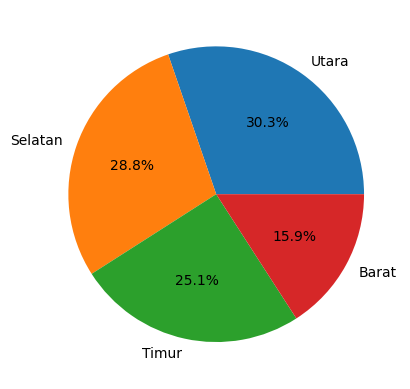

In [18]:
# Distribution of facing
plt.figsize=(10,10)
plt.pie(dataset['facing'].value_counts(), labels = dataset['facing'].value_counts().index, autopct='%1.1f%%')
plt.show()

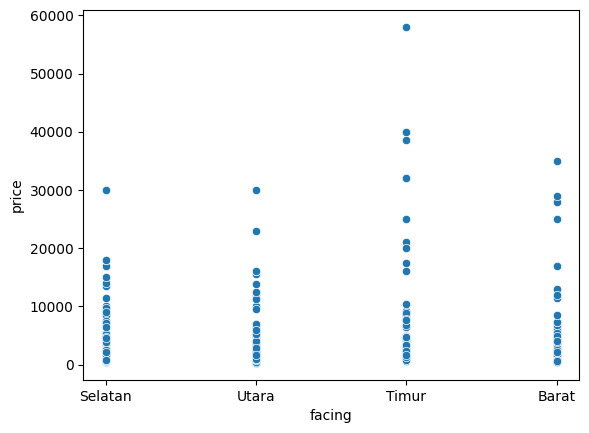

In [19]:
# Facing and price
plt.figsize=(10,10)
sns.scatterplot(x='facing', y='price', data=dataset)
plt.show()

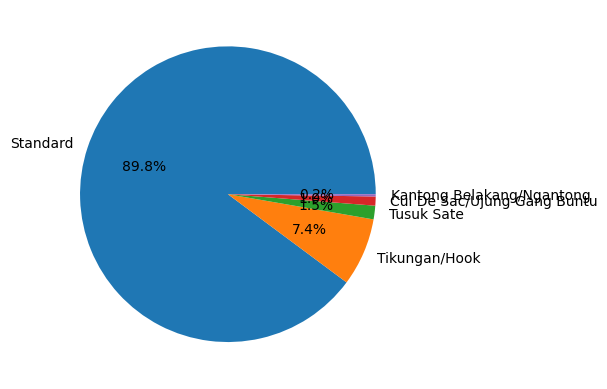

In [20]:
# Distribution of house position
plt.figsize=(10,10)
plt.pie(dataset['house_position'].value_counts(), labels = dataset['house_position'].value_counts().index, autopct='%1.1f%%')
plt.show()

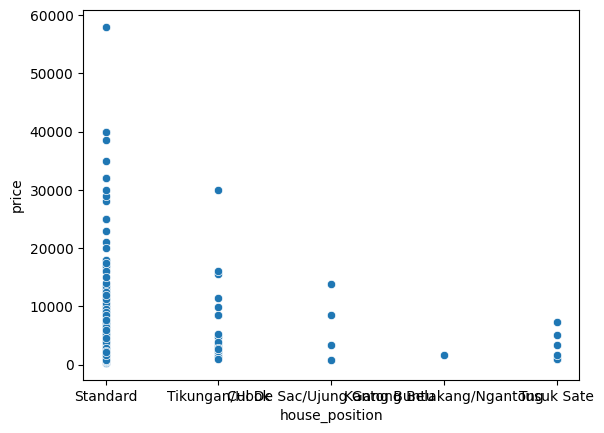

In [21]:
# House position and price
plt.figsize=(10,10)
sns.scatterplot(x='house_position', y='price', data=dataset)
plt.show()

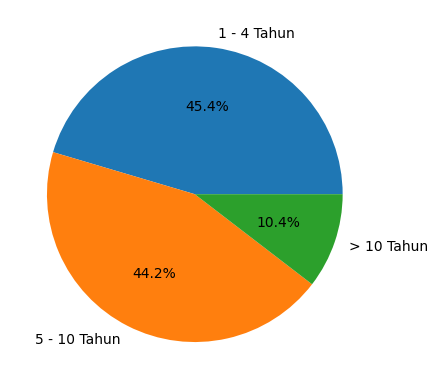

In [22]:
# Distribution of building age
plt.figsize=(10,10)
plt.pie(dataset['building_age'].value_counts(), labels = dataset['building_age'].value_counts().index, autopct='%1.1f%%')
plt.show()

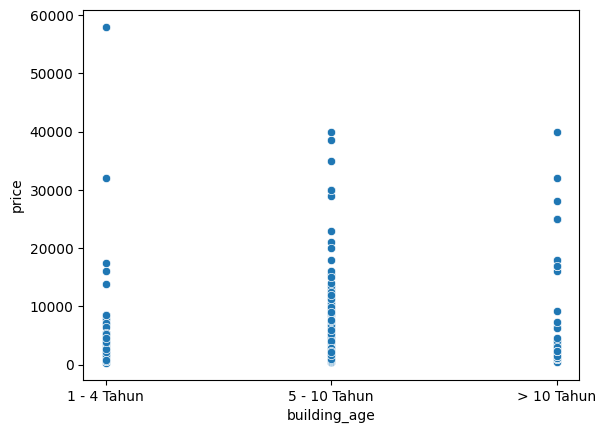

In [23]:
# Building age and price
plt.figsize=(10,10)
sns.scatterplot(x='building_age', y='price', data=dataset)
plt.show()

# Data preparation

Encode categorical features

In [24]:
le = LabelEncoder()
dataset.loc[:, ['ownership_status', 'facing', 'house_position', 'road_width', 'urgent', 'building_age', 'ready_to_use', 'furnished', 'category', 'pricing_category']] = dataset.loc[:, ['ownership_status', 'facing', 'house_position', 'road_width', 'urgent', 'building_age', 'ready_to_use', 'furnished', 'category', 'pricing_category']].apply(le.fit_transform)

dataset.head()


,surface_area,building_area,bedrooms,bathrooms,storey,community_price,price,ownership_status,facing,house_position,road_width,urgent,building_age,ready_to_use,furnished,category,pricing_category
0,72,69,2,2,2,1400000000,1350.0,0,1,2,0,0,0,1,0,0,1
1,60,90,3,2,2,1000000000,1125.0,2,1,2,0,0,0,1,0,2,1
2,210,100,4,2,1,2400000000,1999.0,1,3,2,2,1,1,1,0,2,0
3,120,54,3,1,1,800000000,850.0,1,1,2,2,0,2,0,0,2,2
4,60,90,3,2,2,800000000,1025.0,0,1,2,2,0,0,1,0,2,1


Regression

In [25]:
#Regression
X_reg = dataset.loc[:, dataset.columns != 'price']
y_reg = dataset.loc[:, 'price']

Scale numerical data

In [26]:
scaler = MinMaxScaler()
X_reg_scaled = scaler.fit_transform(X_reg)

Split data into training and validation set

In [27]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_reg_train, y_reg_train)

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_reg_train, y_reg_train)

svr = SVR(kernel='rbf')
svr.fit(X_reg_train, y_reg_train)

d_tree_reg = DecisionTreeRegressor()
d_tree_reg.fit(X_reg_train, y_reg_train)

r_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
r_forest_reg.fit(X_reg_train, y_reg_train)

regressors = []
regressors.append(lin_reg)
regressors.append(knn_reg)
regressors.append(svr)
regressors.append(d_tree_reg)
regressors.append(r_forest_reg)

In [29]:
models = []
rsquared = []
mae = []
rmse = []
for regressor in regressors:
    models.append(regressor.__class__.__name__)
    rsquared.append(r2_score(y_reg_test, regressor.predict(X_reg_test)))
    mae.append(mean_absolute_error(y_reg_test, regressor.predict(X_reg_test)))
    rmse.append(np.sqrt(mean_squared_error(y_reg_test, regressor.predict(X_reg_test))))

evaluation_reg = pd.DataFrame({'Model': models, 'R^2': rsquared, 'MAE': mae, 'RMSE': rmse})
evaluation_reg.head()

,Model,R^2,MAE,RMSE
0,LinearRegression,0.956648,634.768353,1353.660548
1,KNeighborsRegressor,0.644650,1843.675333,3875.530363
2,SVR,-0.076844,3119.850211,6746.514343
3,DecisionTreeRegressor,0.888457,843.024691,2171.321117
4,RandomForestRegressor,0.938616,600.556560,1610.765057


Classification

In [30]:
X_clf = dataset.loc[:, dataset.columns != 'pricing_category']
y_clf = dataset.loc[:, 'pricing_category']

In [31]:
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

In [32]:
classifiers = []

svc = SVC()
svc.fit(X_clf_train, y_clf_train)

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_clf_train, y_clf_train)

d_tree_clf = DecisionTreeClassifier()
d_tree_clf.fit(X_clf_train, y_clf_train)

r_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
r_forest_clf.fit(X_clf_train, y_clf_train)

gnb = GaussianNB()
gnb.fit(X_clf_train, y_clf_train)

classifiers.append(svc)
classifiers.append(knn_clf)
classifiers.append(d_tree_clf)
classifiers.append(r_forest_clf)
classifiers.append(gnb)

In [33]:
models = []
accuracies = []
precisions = []
recalls = []
f1s = []

for classifier in classifiers:
    models.append(classifier.__class__.__name__)
    accuracies.append(accuracy_score(y_clf_test, classifier.predict(X_clf_test)))
    precisions.append(precision_score(y_clf_test, classifier.predict(X_clf_test), average='micro'))
    recalls.append(recall_score(y_clf_test, classifier.predict(X_clf_test), average='micro'))
    f1s.append(f1_score(y_clf_test, classifier.predict(X_clf_test), average='micro'))

evaluation_clf = pd.DataFrame({'Model': models, 'Accuracy': accuracies, 'Precision': precisions, 'Recall': recalls, 'F1': f1s})

evaluation_clf.head()


,Model,Accuracy,Precision,Recall,F1
0,SVC,0.654321,0.654321,0.654321,0.654321
1,KNeighborsClassifier,0.703704,0.703704,0.703704,0.703704
2,DecisionTreeClassifier,0.530864,0.530864,0.530864,0.530864
3,RandomForestClassifier,0.629630,0.629630,0.629630,0.629630
4,GaussianNB,0.641975,0.641975,0.641975,0.641975
